## LIBRAIRIES

In [2]:
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer ,KNNImputer

In [3]:
# fonction

import sys
sys.path.append(r"C:\Users\franc\Desktop\DATA_SCIENCE\ML_PRO\DOC")

from perso import *

### DATASET "titanic"

In [4]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


___
_____

## **1- DIAGNOSTIQUE DU DATATSET**

1. Y-a-t'il des valeurs manquantes?
2. Combien?
3. Comment sont-elles réparties?
4. Filtrer le jeu de données 
5. Analyser les entrées pour tenter de comprendre pourquoi ces valeurs sont NaN

In [6]:
df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

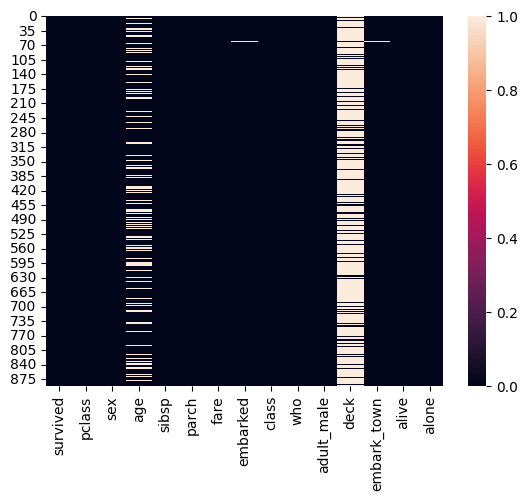

In [7]:
sns.heatmap(df.isna())

on voit que la colonne "deck" est casiment vide, il va donc falloir evaluer la correlation avec la colonne qu'on doit predire


In [8]:
nan_filtre =df.isna().any(axis=1)
# any: s'il y'a au moins un valeur true

nan_df = df[nan_filtre]
nan_index=  df[nan_filtre].index
nan_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### 3. Eiminer les NaN avec Dropna.
un seul objectif :conserver le plus de données possibles 
pour cela,il faut jouer entre le choix des lignes et des colonnes:
- eviterd'eliminer une trop grandes parties de vos lignes
- penser a eliminer une colonne s'il y'a plus de 50% de NaN et elle est peu utilies pour la target

In [9]:
df.drop(labels=["deck",],axis=1,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [10]:
df.dropna(axis=0,thresh=10)
# "thresh: n "où il y'a au moins n valeur non null 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


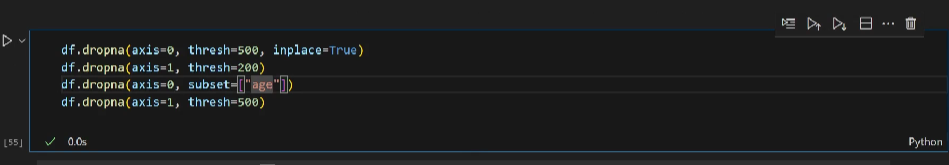

<Axes: >

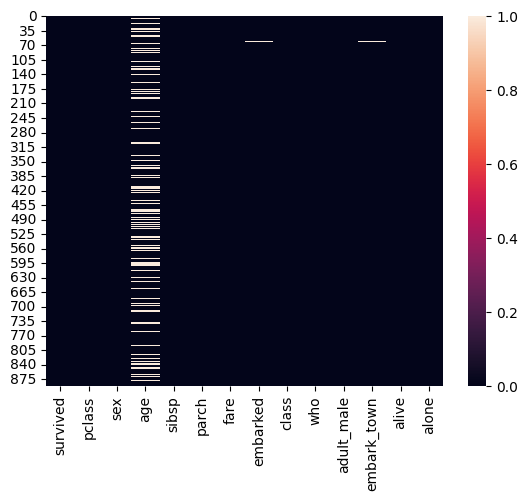

In [11]:
sns.heatmap(df.isna())

## IMPUTER

In [12]:
# from sklearn import set_config
# set_config(transform_output="pandas")

In [13]:
df=sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<Axes: >

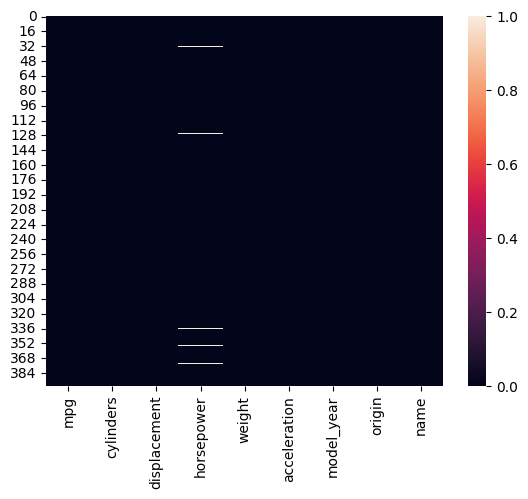

In [15]:
sns.heatmap(df.isna())

In [16]:
nan_filtre =df.isna().any(axis=1)

nan_df = df[nan_filtre]
nan_index=  df[nan_filtre].index
nan_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### SimpleImputer

In [22]:
# df_numeric = df.drop(columns=liste_vd(data=df)) ,je peux utiliser ça,ou la ligne suivante
# les deux mthodes fonctionnent et permettent d'avoir les données d'un types precis
df_numeric = df.select_dtypes(include="number")



In [18]:
imputer=SimpleImputer(strategy="mean")
# si la strategy requiere une valeur numerique ,il va falloir encoder d'abord nos 
# variable qui ne sont pas numerique ou simplement effectuer le travail sur ceux que le sont d'abord
imputer.fit(df_numeric)
pd.DataFrame(imputer.transform(df_numeric),columns=df_numeric.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0
...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0


KNNImputer

In [27]:
imputer= KNNImputer(n_neighbors=5)
imputer.fit(df_numeric)

pd.DataFrame(imputer.transform(df_numeric),columns=df_numeric.columns).iloc[nan_index, : ]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4.0,98.0,62.0,2046.0,19.0,71.0
126,21.0,6.0,200.0,107.6,2875.0,17.0,74.0
330,40.9,4.0,85.0,64.6,1835.0,17.3,80.0
336,23.6,4.0,140.0,112.8,2905.0,14.3,80.0
354,34.5,4.0,100.0,76.0,2320.0,15.8,81.0
374,23.0,4.0,151.0,88.2,3035.0,20.5,82.0
